# Data Augmentation: Visualising Examples

In this notebook, experiments are conducted with various data augmentation techniques to visualise the effects of each technique on the data. 

The main goal is to determine an adequate set of augmentation techniques to use for the final model.

The selected transformation set is the one who yields the highest variation amongst transformed samples while still generating samples that arlook realist

In [1]:
import matplotlib.pyplot as plt
import os
import logging
import tensorflow as tf

os.chdir('..')

from src.utils.data.tfdatasets import load_tf_img_dataset, augmentation_model
from src.utils.dvc.params import get_params

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

2023-07-09 14:19:17.491501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 14:19:17.567629: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-09 14:19:18.017025: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2023-07-09 14:19:18.017068: W tensorflow/compiler/xla/stream_executor/

The augmentation and dataset parameters are set as follows:

In [5]:
DATASET = 'streets'
INPUT_SIZE = (256, 256)

RANDOM_CROP = (224, 224)
RANDOM_FLIP = 'horizontal'
RANDOM_ROTATION = 0
RANDOM_ZOOM = (-0.1, 0.1)
RANDOM_BRIGHTNESS = 0.2
RANDOM_CONTRAST = 0.2
RANDOM_TRANSLATION_HEIGHT = (-0.1, 0.1)
RANDOM_TRANSLATION_WIDTH = (-0.1, 0.1)

In [6]:
augmentation = augmentation_model(
    random_crop=RANDOM_CROP,
    random_flip=RANDOM_FLIP,
    random_rotation=RANDOM_ROTATION,
    random_zoom=RANDOM_ZOOM,
    random_brightness=RANDOM_BRIGHTNESS,
    random_contrast=RANDOM_CONTRAST,
    random_translation_height=RANDOM_TRANSLATION_HEIGHT,
    random_translation_width=RANDOM_TRANSLATION_WIDTH
)

data_dir = os.path.join('data', 'processed', DATASET)
dataset = load_tf_img_dataset(
    dir='train',
    dir_path=data_dir,
    input_size=INPUT_SIZE,
    mode='image_only',
    scale=255,
    shuffle=False,
    augmentation=augmentation,
    batch_size=4
)

Found 454 files belonging to 1 classes.


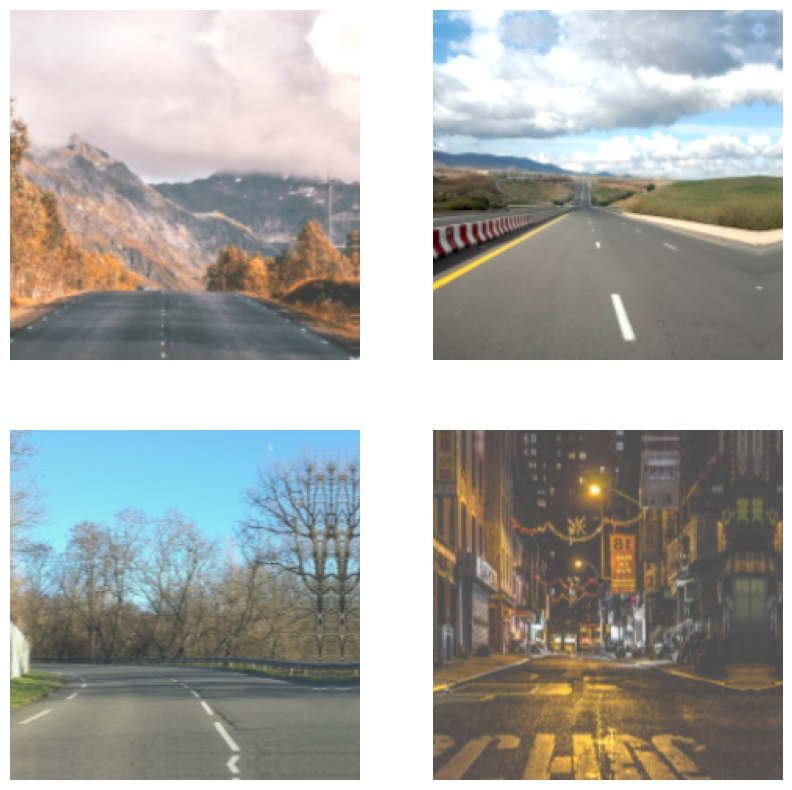

In [7]:

plt.figure(figsize=(10, 10))
for images in dataset:
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
    break
plt.show()